This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** July 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the testing script for solving using a CutFEM scheme the FREE-boundary plasma boundary problem with ITER tokamak geometry. In this case, the different external magnets are defined as COILS (see class in Magnet.py). 

EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

# DEFINE EQUILIBRIUM PROBLEM PARAMETERS

In [1]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

## CREATE GRAD-SHAFRANOV PROBLEM
Equilibrium = GradShafranovSolver()

## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = False
Equilibrium.GhostStabilization = True
Equilibrium.PARALLEL = False

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.dim = 2                    # PROBLEM SPATIAL DIMENSION
Equilibrium.QuadratureOrder2D = 8      # ORDER OF SURFACE NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.QuadratureOrder1D = 4      # ORDER OF LENGTH NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.ext_maxiter = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3           # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4           # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.it_plasma = 0              # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Equilibrium.tol_saddle = 0.2           # TOLERANCE FOR DISTANCE BETWEEN CONSECUTIVE ITERATION SADDLE POINTS (LETS PLASMA REGION CHANGE)
Equilibrium.beta = 1.0e6               # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.Nconstrainedges = -1       # NUMBER OF PLAMA BOUNDARY APPROXIMATION EDGES ON WHICH CONSTRAIN BC
Equilibrium.zeta = 1.0e-2              # GHOST PENALTY PARAMETER
Equilibrium.PSIrelax = False           # PSI SOLUTION AITKEN RELAXATION SWITCH
Equilibrium.lambda0 = 0.3              # INITIAL AIKITEN'S RELAXATION PARAMETER
Equilibrium.PHIrelax = False           # PHI LEVEL-SET AITKEN RELAXATION SWITCH
Equilibrium.alphaPHI = 0.5             # PHI LEVEL-SET AITKEN RELAXATION INITIAL PARAMETER 
Equilibrium.R0_axis = 6.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 1.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0            # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = -3.5           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50          # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6          # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY


# INITIALISE PARAMETERS

In [2]:
Equilibrium.InitialiseParameters()
Equilibrium.InitialisePickleLists()

INITIALISE SIMULATION PARAMETERS...Done!


# SELECT COMPUTATIONAL MESH

In [3]:
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-COARSE-REC'
#MESH = 'TRI03-MEDIUM-REC'
#MESH = 'TRI03-INTERMEDIATE-REC'
#MESH = 'TRI03-FINE-REC'
#MESH = 'TRI03-SUPERFINE-REC'
#MESH = 'TRI03-MEGAFINE-REC'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-COARSE-REC'
#MESH = 'TRI06-MEDIUM-REC'
#MESH = 'TRI06-INTERMEDIATE-REC'
#MESH = 'TRI06-FINE-REC'
MESH = 'TRI06-SUPERFINE-REC'
#MESH = 'TRI06-MEGAFINE-REC'

Equilibrium.MESH = Mesh(MESH)

Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI06-SUPERFINE-REC
READ MESH FILES...Done!


# DEFINE TOKAMAK'S EXTERNAL MAGNETS AND FIRST WALL MESH

Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI03-FINE-ITFW
READ MESH FILES...Done!


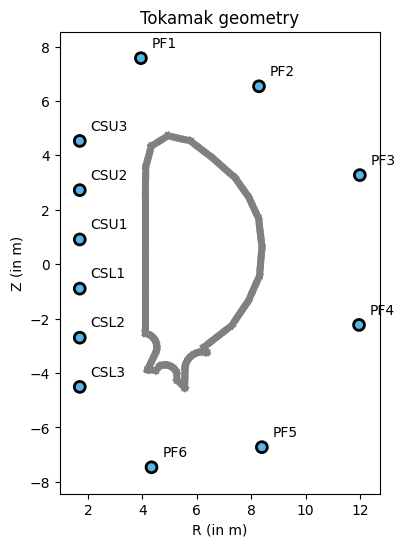

In [4]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS
# COILS
coil1 = Coil(name = 'PF1',
             X = np.array([3.9431,7.5741]),
             I = 5.73e6)
coil2 = Coil(name = 'PF2',
             X = np.array([8.2851,6.5398]),
             I = -2.88e6)
coil3 = Coil(name = 'PF3',
             X = np.array([11.9919,3.2752]),
             I = -5.81e6)
coil4 = Coil(name = 'PF4',
             X = np.array([11.9630,-2.2336]),
             I = -4.78e6)
coil5 = Coil(name = 'PF5',
             X = np.array([ 8.3908,-6.7269]),
             I = -7.81e6)
coil6 = Coil(name = 'PF6',
             X = np.array([4.3340, -7.4665]),
             I = 16.94e6)
   
# SOLENOIDS AS COILS
solenoid1 = Coil(name = 'CSL3',
                 X = np.array([1.696, np.mean([-5.415,-3.6067])]),
                 I = 5.3e6)
solenoid2 = Coil(name = 'CSL2',
                 X = np.array([1.696, np.mean([-3.6067, -1.7983])]),
                 I = -10.3e6)
solenoid3 = Coil(name = 'CSL1',
                 X = np.array([1.696, np.mean([-1.7983, 0.0])]),
                 I = -20.8e6)
solenoid4 = Coil(name = 'CSU1',
                 X = np.array([1.696, np.mean([0.0, 1.8183])]),
                 I = -20.8e6)
solenoid5 = Coil(name = 'CSU2',
                 X = np.array([1.696, np.mean([1.8183, 3.6267])]),
                 I = -4.05e6)
solenoid6 = Coil(name = 'CSU3',
                 X = np.array([1.696, np.mean([3.6267, 5.435])]),
                 I = -4.82e6)

magnets = [coil1, coil2, coil3, coil4, coil5, coil6,
           solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

# TOKAMAK WALL MESH
TOKmesh = Mesh('TRI03-FINE-ITFW')
Equilibrium.TOKAMAK = Tokamak(WALL_MESH = TOKmesh,
                              MAGNETS = magnets)

Equilibrium.TOKAMAK.Plot()

# DEFINE INITIAL PLASMA BOUNDARY

PLASMA BOUNDARY PARAMETRISED USING CUBIC HAMILTONIAN 0-LEVEL CONTOUR

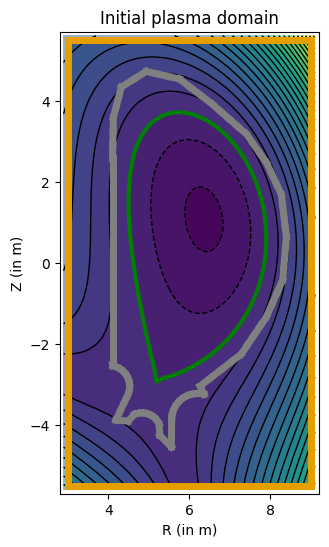

In [5]:
import numpy as np

X_SADDLE = np.array([5.2, -2.9])       # ACTIVE SADDLE POINT   
X_RIGHT = np.array([7.9, 0.6])         # POINT ON RIGHT
X_LEFT = np.array([4.5, 1.5])          # POINT ON LEFT
X_TOP = np.array([5.9, 3.7])           # POINT ON TOP

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM = Equilibrium,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

Equilibrium.initialPHI.Plot()

# DISCRETISE DOMAIN

In [6]:
Equilibrium.DomainDiscretisation(INITIALISATION = True)()

INITIALISE ELEMENTAL DISCRETISATION...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.017818574514037656 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.20265348838508873 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·19.738125565344674
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Warning:  Element 2884, subelem 0: surface integration quadrature is not accurate.
Done!
Done!


# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX

NORMALISED PARAMETRISED CUBIC HAMILTONIAN

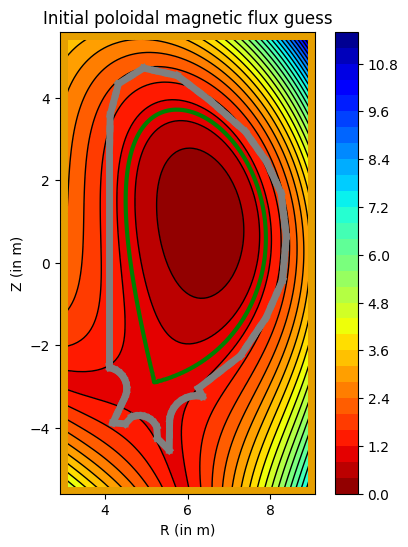

In [7]:
X_SADDLE = np.array([5.2, -2.9])
X_RIGHT = np.array([7.9, 0.6])
X_LEFT = np.array([4.5, 1.5])
X_TOP = np.array([5.9, 3.7])

X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

Equilibrium.initialPSI.Plot()

# INTIALISE PSI ARRAYS

In [8]:
Equilibrium.InitialisePSI()

INITIALISE PSI...
     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
     -> ASSIGN INITIAL PLASMA BOUNDARY VALUES...Done!
Done!


# DEFINE PLASMA CURRENT MODEL

APEC PROFILES PLASMA CURRENT MODEL

Total current integrated =  14999999.999999953


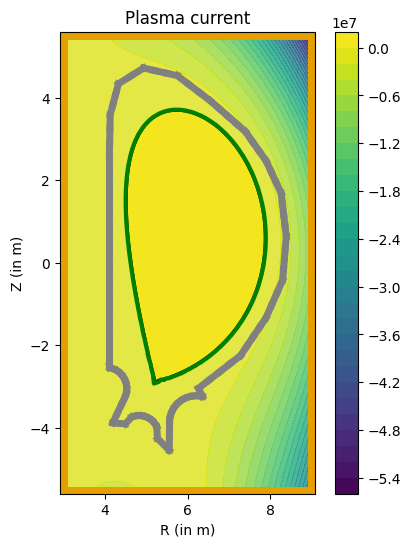

In [9]:
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT

print('Total current integrated = ', Equilibrium.IntegratePlasmaDomain(Equilibrium.PlasmaCurrent.Jphi))
Equilibrium.PlasmaCurrent.Plot()

# RUN SIMULATION

In [10]:
## NAME SIMULATION CASE 
CASE = "TS-FREE-APEC-ITER-COILS"

## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE PSI_B...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...

KeyboardInterrupt: 